# 111大專院校各校科系別學生數 資料集處理 (LATIA 112-1)

TA : TAHRD 113 高奕弘

In [2]:
import pandas as pds
import matplotlib.pyplot as plt
import random

plt.rc("font", family="Microsoft JhengHei")  # 讓 plt 可以顯示中文

data = pds.read_csv("111_students.csv", encoding="utf-8")
data.isnull().sum().sum()  # 檢查空值數量

0

In [3]:
data

,學年度,學校代碼,學校名稱,科系代碼,科系名稱,日間∕進修別,等級別,總計,男生計,女生計,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
0,111,1044,聖約翰科技大學,4131005,企業管理系,D 日,B 四技,10,4,6,...,0,0,0,0,0,0,2,0,01 新北市,2 技職
1,111,2,國立清華大學,7151134,AI智慧製造與工業物聯網產業碩士專班,D 日,M 碩士,3,3,0,...,0,0,0,0,0,0,0,0,18 新竹市,1 一般
2,111,2,國立清華大學,7151141,AI智慧製造與智慧物聯網產業碩士專班,D 日,M 碩士,6,5,1,...,0,0,0,0,0,0,0,0,18 新竹市,1 一般
3,111,1048,亞洲大學,4131055,EMBA高階經理碩士在職學位學程,N 職,M 碩士,11,9,2,...,0,0,0,0,0,0,0,0,06 臺中市,1 一般
4,111,52,國立屏東大學,1115073,STEM教育國際碩士學位學程,D 日,M 碩士,4,0,4,...,0,0,0,0,0,0,0,0,13 屏東縣,1 一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,111,1023,南臺科技大學,9211062,高齡福祉服務系,N 修,C 二技,50,6,44,...,0,0,0,0,0,0,1,2,11 臺南市,2 技職
9771,111,1195,馬偕醫學院,7193006,高齡福祉科技研究所,D 日,M 碩士,16,6,10,...,0,0,0,0,0,0,0,0,01 新北市,1 一般
9772,111,1025,嘉南藥理大學,9211047,高齡福祉養生管理系,D 日,B 四技,114,28,86,...,0,0,0,0,0,0,2,2,11 臺南市,2 技職
9773,111,1025,嘉南藥理大學,9211047,高齡福祉養生管理系,N 修,C 二技,62,19,43,...,0,0,0,0,0,0,0,0,11 臺南市,2 技職


## 資料總覽

本資料總共蒐集多少大專院校，並依國/私立、縣市別區分

In [4]:
school_SorI = []

for i in data['學校名稱']:
    if ('國立' in i) or ('市立' in i):
        school_SorI.append('國立')
    else:
        school_SorI.append('私立')

data['公私立'] = school_SorI # 將 Dataframe 新增「公私立」column

### 大專院校總數以及公立和私立分別有幾所

目前有 148 間大專院校
其中國立學校有47間,私立有101間


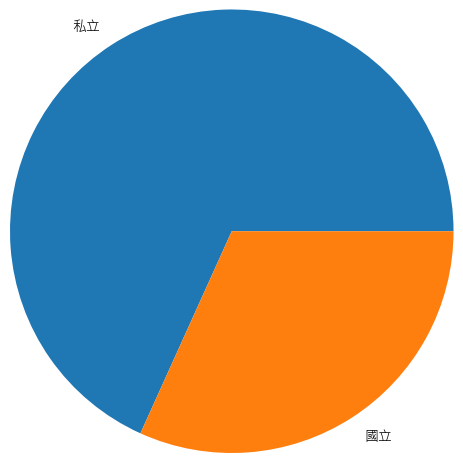

In [5]:
data_buf = data.drop_duplicates(subset=['學校名稱'])

school_name  = data_buf['學校名稱'].unique()
school_count = data_buf['公私立'].value_counts()
school_SorI  = data_buf['公私立'].unique()
school_num   = school_name.__len__()
print('目前有'
      ,school_num
      ,'間大專院校')
print(f'其中國立學校有{school_count["國立"]}間,私立有{school_count["私立"]}間')
plt.pie(school_count,radius=1.5,labels = school_SorI)
plt.show()

### 各縣市分別有幾所大專院校

In [6]:
city_list = []
for i in data['縣市名稱']:
    city_list.append(i[3:])
data['縣市名稱'] = city_list

In [9]:
city_to_area = {'臺北市':'北部', '新北市':'北部', '基隆市':'北部', 
                '新竹市':'北部', '桃園市':'北部', '新竹縣':'北部', 
                '宜蘭縣':'北部', '臺中市':'中部', '苗栗縣':'中部', 
                '彰化縣':'中部', '南投縣':'中部', '雲林縣':'中部', 
                '高雄市':'南部', '臺南市':'南部', '嘉義市':'南部', 
                '嘉義縣':'南部', '屏東縣':'南部', '澎湖縣':'南部', 
                '花蓮縣':'東部', '臺東縣':'東部', '金門縣':'福建省'
                }
data['區域'] = data['縣市名稱'].map(city_to_area)

data_buf = data.drop_duplicates(subset=['縣市名稱','學校名稱','區域'])
school_city = data_buf['縣市名稱'].value_counts()

city_list = data_buf['縣市名稱'].unique()
# area_list.sort(area_list['區域'])
print(f"本資料集共收集了 {school_num} 所學校，其中：")

for city in city_list:
    print(f"{city} 有 {school_city[city]} 所大專院校")

本資料集共收集了 148 所學校，其中：
新北市 有 20 所大專院校
新竹市 有 5 所大專院校
臺中市 有 17 所大專院校
屏東縣 有 5 所大專院校
高雄市 有 16 所大專院校
臺北市 有 24 所大專院校
臺南市 有 14 所大專院校
桃園市 有 12 所大專院校
嘉義縣 有 4 所大專院校
嘉義市 有 2 所大專院校
宜蘭縣 有 3 所大專院校
花蓮縣 有 4 所大專院校
南投縣 有 2 所大專院校
彰化縣 有 5 所大專院校
苗栗縣 有 3 所大專院校
臺東縣 有 2 所大專院校
金門縣 有 1 所大專院校
新竹縣 有 2 所大專院校
雲林縣 有 3 所大專院校
基隆市 有 3 所大專院校
澎湖縣 有 1 所大專院校


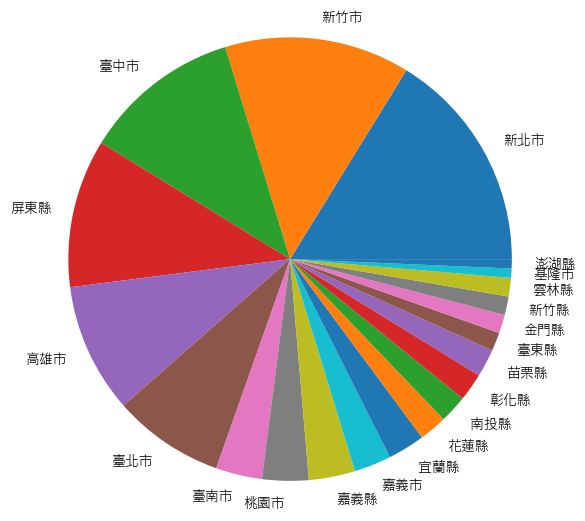

In [10]:
plt.pie(school_city,
        radius=1.5,
        labels = area_list)
plt.show()

## 各區學校數量總額和就學男女比

### 各區學校數量

In [13]:
school_area = data_buf['區域'].value_counts()
area_list = data_buf['區域'].unique()
for area in area_list:
    print(f"{area} 有 {school_area[area]} 所大專院校")

北部 有 69 所大專院校
中部 有 30 所大專院校
南部 有 42 所大專院校
東部 有 6 所大專院校
福建省 有 1 所大專院校


In [15]:
girl_num = sum(data['女生計'])

575913
